In [33]:
import pandas as pd
import numpy as np

# Create a date range
date_range = pd.date_range(start="1/1/2019", end="12/31/2019")

# Create a list of 1000 random dates from the date range
dates = np.random.choice(date_range, 1000, replace=True)

# Create a list of 1000 unique 6 digit patient IDs
patient_ids = np.arange(100000, 101000)

# Shuffle the patient IDs to randomize them
np.random.shuffle(patient_ids)

# Create a list of 1000 random ages between 1 and 100
ages = np.random.randint(1, 101, 1000)

# Create a list of 1000 random sexes (either 'Male' or 'Female')
sexes = np.random.choice(['Male', 'Female'], 1000)

# Create a list of 1000 random covid positivity statuses (either 'Positive' or 'Negative')
covid_positivity = np.random.choice(['Positive', 'Negative'], 1000)

# Create a data frame
data = pd.DataFrame({
    'Date': dates,
    'Patient_ID': patient_ids,
    'Age': ages,
    'Sex': sexes,
    'Covid_Positivity': covid_positivity
})

# Print the data frame
print(data)


          Date  Patient_ID  Age     Sex Covid_Positivity
0   2019-04-22      100058   71    Male         Negative
1   2019-07-24      100904   67    Male         Positive
2   2019-02-22      100815   33  Female         Negative
3   2019-08-12      100026   55  Female         Negative
4   2019-11-27      100649   43  Female         Positive
..         ...         ...  ...     ...              ...
995 2019-12-22      100812   31  Female         Negative
996 2019-08-01      100799   59    Male         Positive
997 2019-07-09      100469   97  Female         Positive
998 2019-11-08      100222    9    Male         Negative
999 2019-06-04      100207   83  Female         Negative

[1000 rows x 5 columns]


In [34]:
# Create a list of 1000 random covid positivity statuses (either 1 or 0)
covid_positivity = np.random.choice([1, 0], 1000)

# Create a data frame
data = pd.DataFrame({
    'Date': dates,
    'Patient_ID': patient_ids,
    'Age': ages,
    'Sex': sexes,
    'Covid_Positivity': covid_positivity
})

# Print the data frame
print(data)


          Date  Patient_ID  Age     Sex  Covid_Positivity
0   2019-04-22      100058   71    Male                 0
1   2019-07-24      100904   67    Male                 1
2   2019-02-22      100815   33  Female                 1
3   2019-08-12      100026   55  Female                 1
4   2019-11-27      100649   43  Female                 1
..         ...         ...  ...     ...               ...
995 2019-12-22      100812   31  Female                 0
996 2019-08-01      100799   59    Male                 1
997 2019-07-09      100469   97  Female                 1
998 2019-11-08      100222    9    Male                 1
999 2019-06-04      100207   83  Female                 1

[1000 rows x 5 columns]


In [35]:
# Save the data frame to a CSV file
data.to_csv('dummy_data.csv', index=False)

# Print a message indicating that the data has been saved
print("Data has been saved to 'dummy_data.csv'")


Data has been saved to 'dummy_data.csv'


In [39]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [40]:
# Print the dataset information
print(df.info())

# Check and print the number of missing values in each column
print("\nMissing values in each column:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  154 non-null    object 
 1   Country/Region  312 non-null    object 
 2   Last Update     312 non-null    object 
 3   Confirmed       312 non-null    int64  
 4   Deaths          312 non-null    int64  
 5   Recovered       312 non-null    int64  
 6   Latitude        309 non-null    float64
 7   Longitude       309 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 19.6+ KB
None

Missing values in each column:

Province/State    158
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            3
Longitude           3
dtype: int64


In [42]:
df[df['Latitude'].isnull() | df['Longitude'].isnull()]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
275,Unknown,China,2020-03-17T11:53:10,0,0,0,NaN,NaN
296,Unknown,Malaysia,2020-03-17T11:53:10,0,0,0,NaN,NaN
303,Unknown,Ukraine,2020-03-17T11:53:10,0,0,0,NaN,NaN


In [12]:
# Step 1: Grab the first not-null 'Latitude' and 'Longitude' for each 'Country/Region' from the dataset
first_not_null_values = df.groupby('Country/Region')[['Latitude', 'Longitude']].first()

# Step 2: Fill the null values of 'Latitude' and 'Longitude' based on the same 'Country/Region' values stored in Step 1
df['Latitude'] = df.groupby('Country/Region')['Latitude'].transform(lambda x: x.fillna(first_not_null_values.loc[x.name, 'Latitude']))
df['Longitude'] = df.groupby('Country/Region')['Longitude'].transform(lambda x: x.fillna(first_not_null_values.loc[x.name, 'Longitude']))

df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
...,...,...,...,...,...,...,...,...
307,Wales,United Kingdom,2020-03-17T11:53:10,0,5,0,52.1307,-3.7837
308,NaN,Nauru,2020-03-17T11:53:10,0,0,0,-0.5228,166.9315
309,Niue,New Zealand,2020-03-17T11:53:10,0,0,0,-19.0544,-169.8672
310,NaN,Tuvalu,2020-03-17T11:53:10,0,0,0,-7.1095,177.6493


In [13]:
# Calculate active cases as 'Confirmed' - ('Deaths' + 'Recovered')
df['Active'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])

# Group by 'Country/Region' and sum the values to get the latest number of confirmed, deaths, recovered, and active cases
latest_stats = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Print the resulting DataFrame
latest_stats

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,26,0,1,25
1,Albania,55,1,0,54
2,Algeria,60,4,12,44
3,Andorra,39,0,1,38
4,Antarctica,0,0,0,0
...,...,...,...,...,...
163,Uzbekistan,10,0,0,10
164,Venezuela,33,0,0,33
165,Vietnam,66,0,16,50
166,Winter Olympics 2022,0,0,0,0


In [23]:
# Filtering the 'Country/Region' for only 'United Kingdom'
latest_stats[latest_stats['Country/Region'] == 'United Kingdom']

,Country/Region,Confirmed,Deaths,Recovered,Active
161,United Kingdom,1954,217,53,1684


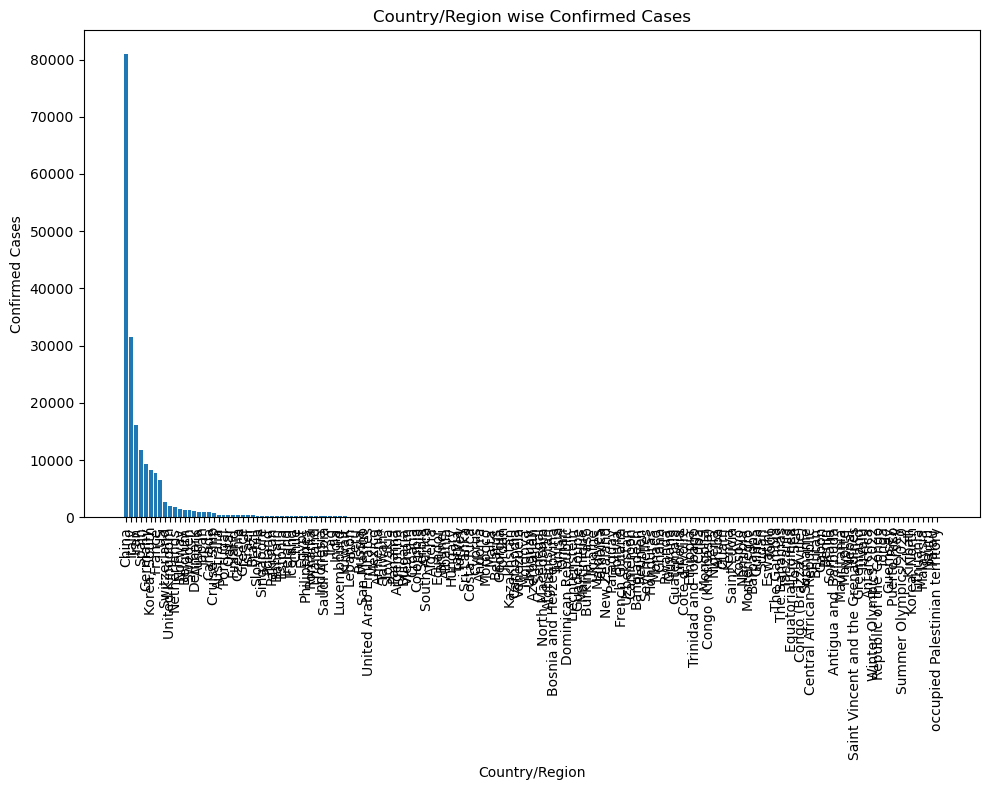

In [15]:
import matplotlib.pyplot as plt

# Sort the data in descending order of 'Confirmed' cases
latest_stats_sorted = latest_stats.sort_values(by='Confirmed', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(latest_stats_sorted['Country/Region'], latest_stats_sorted['Confirmed'])
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.title('Country/Region wise Confirmed Cases')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

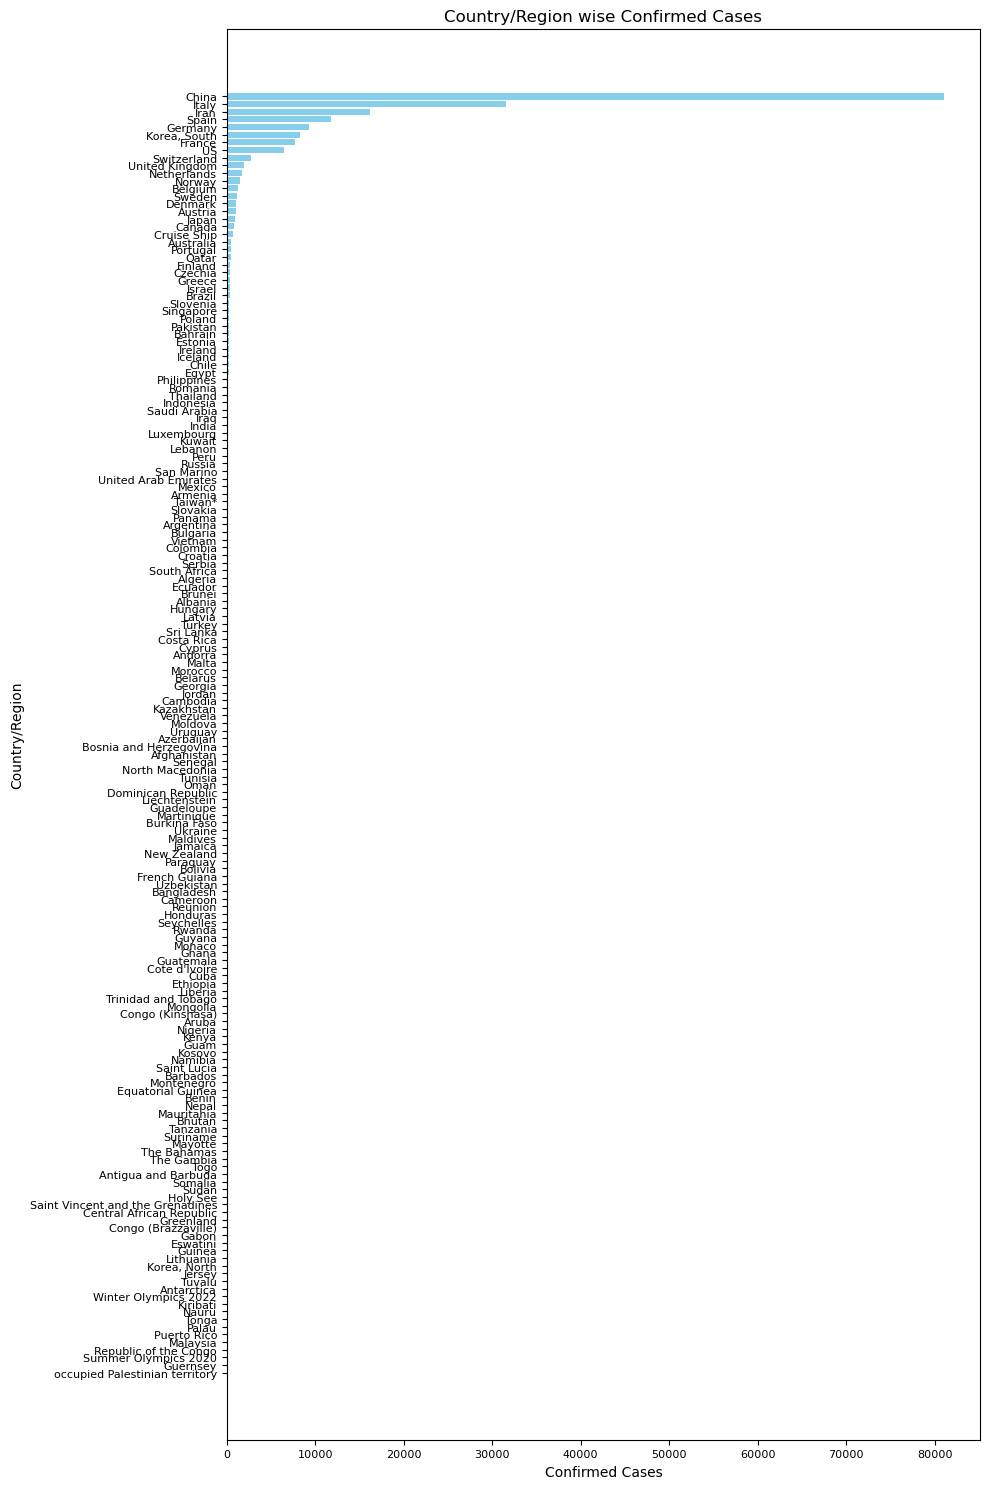

In [36]:
# Plotting
plt.figure(figsize=(10, 15))
plt.barh(latest_stats_sorted['Country/Region'], latest_stats_sorted['Confirmed'], color='skyblue')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('Country/Region wise Confirmed Cases')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


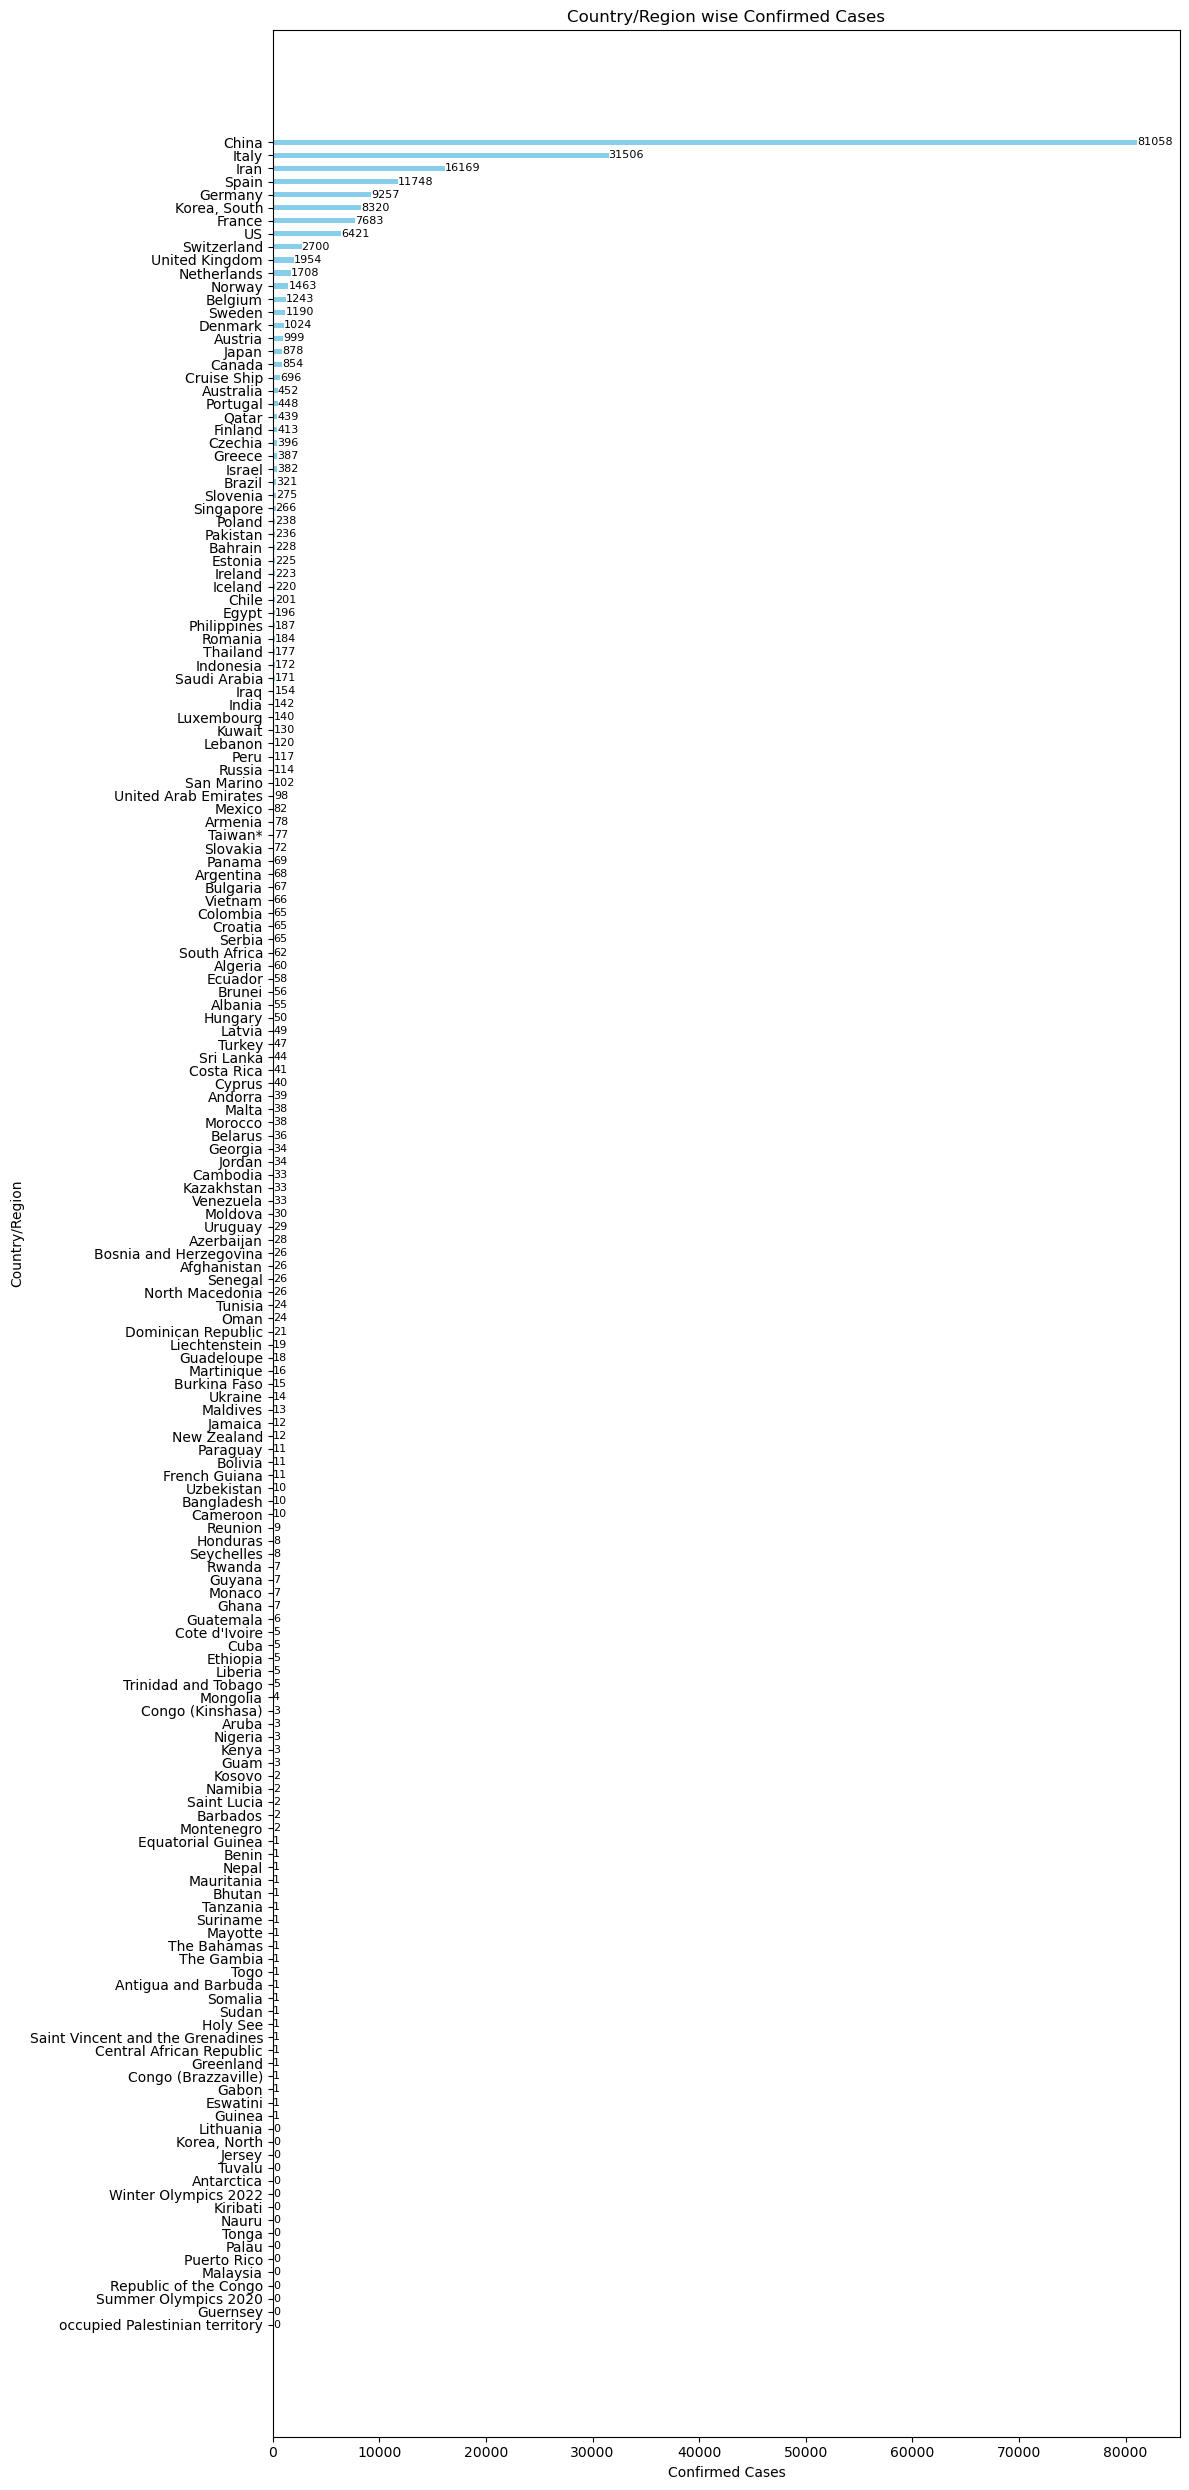

In [37]:
# Plotting
plt.figure(figsize=(12, 25)) # Increase the height of the figure
bars = plt.barh(latest_stats_sorted['Country/Region'], latest_stats_sorted['Confirmed'], color='skyblue', height=0.4)

plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('Country/Region wise Confirmed Cases')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping

# Adding data labels on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', fontsize=8)

# Show the plot
plt.show()


In [31]:
import pandas as pd
# Step 1: Read the CSV file
df = pd.read_csv('./Hands-on/time_series_data.csv')
df

,date_column,value_column
0,01/01/2023,52.483571
1,02/01/2023,57.264356
2,03/01/2023,63.262447
3,04/01/2023,62.366075
4,05/01/2023,45.039846
...,...,...
360,27/12/2023,106.386119
361,28/12/2023,102.912769
362,29/12/2023,89.432195
363,30/12/2023,94.052881


/opt/miniconda3/envs/velor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/velor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/velor/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


           date_column  value_column
2024-01-01  2024-01-01    104.603158
2024-01-02  2024-01-02    109.733952
2024-01-03  2024-01-03    105.482473
2024-01-04  2024-01-04     96.329319
2024-01-05  2024-01-05     95.033835
2024-01-06  2024-01-06     96.889515
2024-01-07  2024-01-07    101.118370


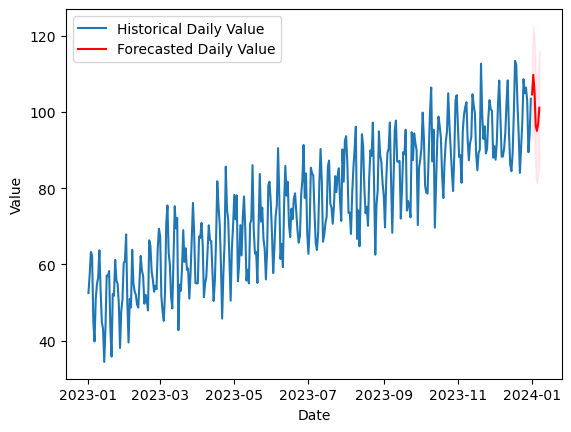

In [32]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 2: Convert 'date_column' to datetime type with the corrected format and set it as the index
df['date_column'] = pd.to_datetime(df['date_column'], format='%d/%m/%Y')
df.set_index('date_column', inplace=True)

# Step 3: Train an ARIMA model (you might need to adjust the order based on the characteristics of your data)
model = ARIMA(df['value_column'], order=(5,1,0))
model_fit = model.fit()

# Step 4: Get the last date in the 'date_column' and generate dates for the next 7 days
last_date = df.index.max()
next_7_dates = [last_date + timedelta(days=i) for i in range(1, 8)]

# Step 5: Forecast the 'value_column' for the next 7 days
forecast_results = model_fit.get_forecast(steps=7)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Step 6: Create a new DataFrame with the predictions for the next 7 days
predictions = pd.DataFrame({
    'date_column': next_7_dates,
    'value_column': forecast
})

# Step 7: Print the predictions
print(predictions)

# Optional: Plot the historical data and the forecast
plt.figure()
plt.plot(df.index, df['value_column'], label='Historical Daily Value')
plt.plot(predictions['date_column'], predictions['value_column'], label='Forecasted Daily Value', color='red')
# Optionally plot the confidence intervals
plt.fill_between(predictions['date_column'], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

